In [8]:

import pandas as pd
def get_df():
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\Dokumenty\GitHub\predikce-nabidky\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:13])
    df = df.drop(df.index[-1:])
    df['datetime'] = pd.date_range(start='2016-03-01', periods=85, freq='MS')
    return df
get_df()

,datum,Unnamed: 1,repo-1,repo-2,repo-3,repo-4,repo-5,repo-6,repo-7,repo-8,...,doba-6,doba-7,doba-8,doba-9,doba-10,doba-11,doba-12,index,datetime,constant
13,201603,5,5,5,5,5,5,5,5,5,...,70.0,64.0,67.0,70.0,42.0,76.0,77.0,13,2016-03-01,1
14,201604,5,5,5,5,5,5,5,5,5,...,69.0,70.0,64.0,67.0,70.0,42.0,76.0,14,2016-04-01,1
15,201605,5,5,5,5,5,5,5,5,5,...,66.0,69.0,70.0,64.0,67.0,70.0,42.0,15,2016-05-01,1
16,201606,5,5,5,5,5,5,5,5,5,...,77.0,66.0,69.0,70.0,64.0,67.0,70.0,16,2016-06-01,1
17,201607,5,5,5,5,5,5,5,5,5,...,74.0,77.0,66.0,69.0,70.0,64.0,67.0,17,2016-07-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,202211,700,700,700,700,700,700,575,500,450,...,60.0,62.0,62.0,67.0,76.0,66.0,61.0,93,2022-11-01,1
94,202212,700,700,700,700,700,700,575,500,450,...,66.0,60.0,62.0,62.0,67.0,76.0,66.0,94,2022-12-01,1
95,202301,700,700,700,700,700,700,575,500,450,...,68.0,66.0,60.0,62.0,62.0,67.0,76.0,95,2023-01-01,1
96,202302,700,700,700,700,700,700,575,500,450,...,67.0,68.0,66.0,60.0,62.0,62.0,67.0,96,2023-02-01,1


detrendování dat

In [9]:
df = get_df()
df_detrend = df.copy()
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
for parametr in parametry:
    df_detrend[parametr] = pd.Series((df[parametr]))

deseasonalizování dat

In [10]:
import statsmodels.api as sm
df_deseasoned = df_detrend.copy()
for parametr in parametry:
    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values



grafy

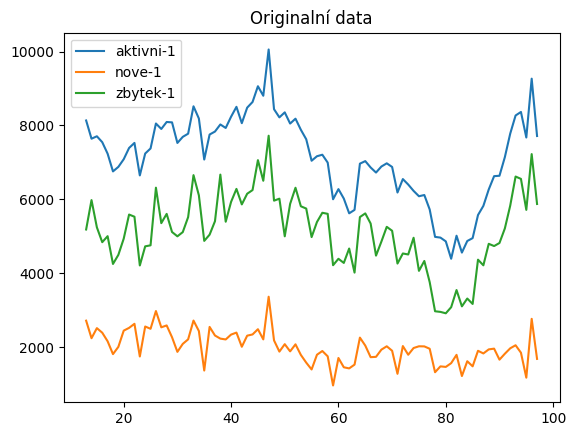

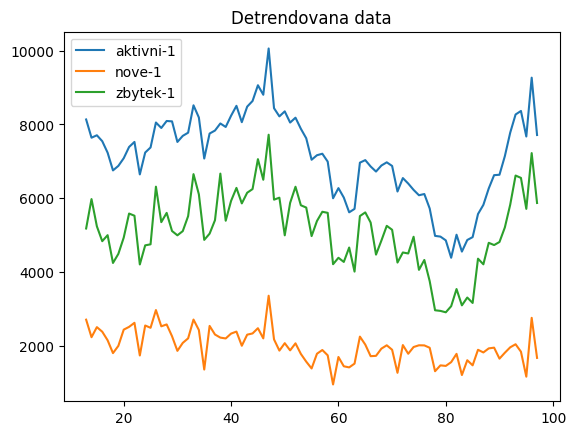

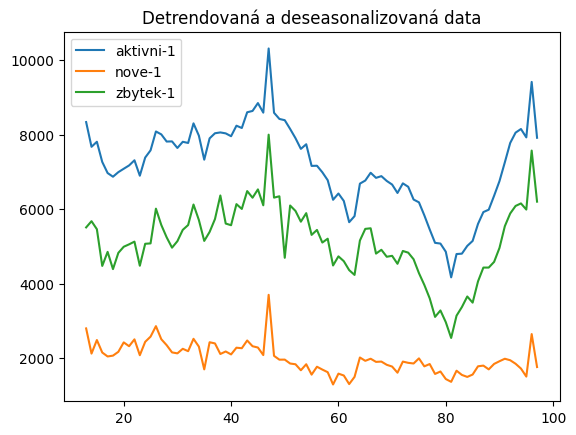

In [11]:
from matplotlib import pyplot as plt
#>> originalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Originalní data')
plt.show()
#>> detrendovana data
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovana data')
plt.show()
#>> detrendovana a deseasonalizovana data
plt.plot(df.index, df_deseasoned['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_deseasoned['nove-1'], label='nove-1')
plt.plot(df.index, df_deseasoned['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Detrendovaná a deseasonalizovaná data')
plt.show()

OLS model

In [12]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score

import statsmodels.api as sm

#*defiunovani dat
#@parametry
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
X = df_deseasoned[parametry]
y = df_deseasoned['aktivni']

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
y_test = y.drop(y.index[:-12])

#* fitnuti ols_model modelu na train datech
ols_model = sm.OLS(y_train, X_train).fit()


#*predikce na train datech
y_pred_train = ols_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_pred_train)

#*preikce na test setu
y_pred = ols_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)

#>> output
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"r2 train setu: {r2_train:.2f}")
print(f"r2 test setu: {r2_test:.2f}")
print(ols_model.summary())

Mean absolute error: 595.37
Mean squared error: 478426.19
Root mean squared error: 691.68
r2 train setu: 0.86
r2 test setu: 0.46
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              6374.
Date:                Thu, 04 May 2023   Prob (F-statistic):                    3.15e-85
Time:                        15:08:41   Log-Likelihood:                         -546.97
No. Observations:                  73   AIC:                                      1100.
Df Residuals:                      70   BIC:                                      1107.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                          

predikce

In [13]:
display(df_deseasoned)
df_new = df_deseasoned.drop(df_deseasoned.index[:-1])
x_new = df_new[["aktivni", "nove", "zbytek"]]
predictions = []
print(x_new)
y_pred = ols_model.predict(x_new)
print(f"""
Model:      {ols_model}
Min:        {int(y_pred-rmse)}
Predikce:   {int(y_pred)}
Max:        {int(y_pred+rmse)}
Rmse:       {int(rmse)}
""")

,datum,Unnamed: 1,repo-1,repo-2,repo-3,repo-4,repo-5,repo-6,repo-7,repo-8,...,doba-6,doba-7,doba-8,doba-9,doba-10,doba-11,doba-12,index,datetime,constant
13,201603,5,5,5,5,5,5,5,5,5,...,70.0,64.0,67.0,70.0,42.0,76.0,77.0,13,2016-03-01,1
14,201604,5,5,5,5,5,5,5,5,5,...,69.0,70.0,64.0,67.0,70.0,42.0,76.0,14,2016-04-01,1
15,201605,5,5,5,5,5,5,5,5,5,...,66.0,69.0,70.0,64.0,67.0,70.0,42.0,15,2016-05-01,1
16,201606,5,5,5,5,5,5,5,5,5,...,77.0,66.0,69.0,70.0,64.0,67.0,70.0,16,2016-06-01,1
17,201607,5,5,5,5,5,5,5,5,5,...,74.0,77.0,66.0,69.0,70.0,64.0,67.0,17,2016-07-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,202211,700,700,700,700,700,700,575,500,450,...,60.0,62.0,62.0,67.0,76.0,66.0,61.0,93,2022-11-01,1
94,202212,700,700,700,700,700,700,575,500,450,...,66.0,60.0,62.0,62.0,67.0,76.0,66.0,94,2022-12-01,1
95,202301,700,700,700,700,700,700,575,500,450,...,68.0,66.0,60.0,62.0,62.0,67.0,76.0,95,2023-01-01,1
96,202302,700,700,700,700,700,700,575,500,450,...,67.0,68.0,66.0,60.0,62.0,62.0,67.0,96,2023-02-01,1


    aktivni    nove  zbytek
97   7773.0  1788.0  6607.0

Model:      <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000236766C72E0>
Min:        6942
Predikce:   7634
Max:        8326
Rmse:       691



graf predikce

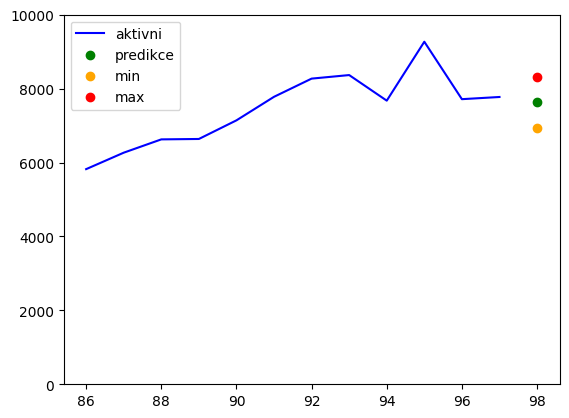

In [14]:
#* realita
plt.plot(y_test.index, y_test.values,label="aktivni",color="blue")
#* predikce
plt.scatter(df_new.index+1, y_pred.values, label='predikce', color="green")
plt.scatter(df_new.index+1, y_pred.values-rmse, label='min', color="orange")
plt.scatter(df_new.index+1, y_pred.values+rmse, label='max', color="red")
plt.ylim(0,10000)
plt.legend()
plt.show()

grafy vztahů

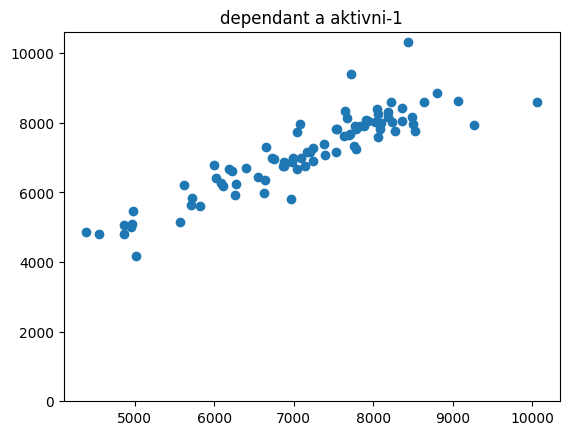

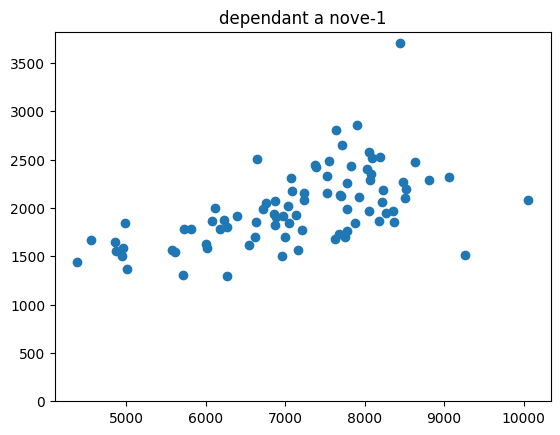

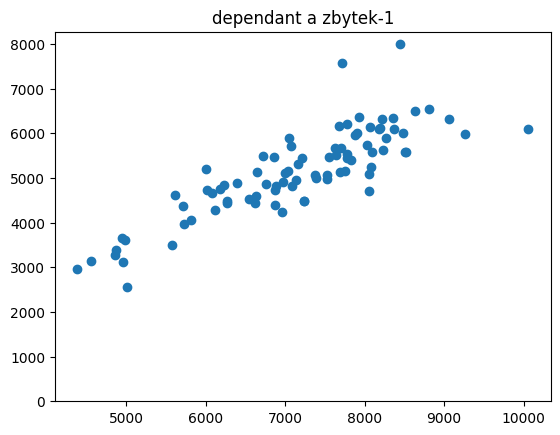

In [21]:
parametry = ['aktivni-1', 'nove-1', 'zbytek-1']
for parametr in parametry:
    plt.scatter(df_deseasoned['aktivni'], df_deseasoned[parametr])
    plt.ylim(0)
    plt.title(f'dependant a {parametr}')
    plt.show()